In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

train_data, test_data = tfds.load(
    name="imdb_reviews",
    split=["train", "test"],
    batch_size=-1, 
    as_supervised=True
)
# /Users/jheaton/tensorflow_datasets/imdb_reviews/plain_text/0.1.0

# print(train_data)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

index=1
print(train_examples[index])
# print(train_labels[index])

# print(train_examples[:3])
# print(train_labels[:3])

2025-08-07 20:34:57.885219: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-07 20:34:57.885253: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-07 20:34:57.886106: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-07 20:34:57.891246: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-07 20:34:59.723141: I exter

b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.'


In [2]:
hub_model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(
    hub_model, 
    output_shape=[20], 
    input_shape=[],
    dtype=tf.string, 
    trainable=True
)

# print(hub_layer(train_examples[:3]))
print(hub_layer(train_examples[:1]))

tf.Tensor(
[[ 1.7657859  -3.882232    3.913424   -1.5557289  -3.3362343  -1.7357956
  -1.9954445   1.298955    5.081597   -1.1041285  -2.0503852  -0.7267516
  -0.6567596   0.24436145 -3.7208388   2.0954835   2.2969332  -2.0689783
  -2.9489715  -1.1315986 ]], shape=(1, 20), dtype=float32)


In [3]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400373 (1.53 MB)
Trainable params: 400373 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
init_weights = model.get_weights()

In [5]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [6]:
monitor = EarlyStopping(
    monitor='val_loss', 
    min_delta=1e-3,
    patience=5, 
    verbose=1, 
    mode='auto',
    restore_best_weights=True
)

model.set_weights(init_weights)

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=40,
    batch_size=512,
    callbacks=[monitor],
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/40


2025-08-07 20:35:03.244158: I external/local_xla/xla/service/service.cc:168] XLA service 0x751a4540ed30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-07 20:35:03.244208: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-08-07 20:35:03.244222: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-08-07 20:35:03.255926: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-07 20:35:03.303268: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1754616903.415000  313258 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 [==============================] - 10s 259ms/step - loss: 1.5096 - accuracy: 0.4996 - val_loss: 0.8763 - val_accuracy: 0.4938
Epoch 2/40
30/30 [==============================] - 7s 234ms/step - loss: 0.7487 - accuracy: 0.4820 - val_loss: 0.6988 - val_accuracy: 0.5167
Epoch 3/40
30/30 [==============================] - 7s 236ms/step - loss: 0.6798 - accuracy: 0.5617 - val_loss: 0.6607 - val_accuracy: 0.6066
Epoch 4/40
30/30 [==============================] - 7s 238ms/step - loss: 0.6388 - accuracy: 0.6451 - val_loss: 0.6250 - val_accuracy: 0.6679
Epoch 5/40
30/30 [==============================] - 6s 208ms/step - loss: 0.6025 - accuracy: 0.6885 - val_loss: 0.5952 - val_accuracy: 0.6957
Epoch 6/40
30/30 [==============================] - 7s 225ms/step - loss: 0.5703 - accuracy: 0.7181 - val_loss: 0.5675 - val_accuracy: 0.7182
Epoch 7/40
30/30 [==============================] - 5s 176ms/step - loss: 0.5369 - accuracy: 0.7433 - val_loss: 0.5339 - val_accuracy: 0.7426
Epoch 8/40
30/30

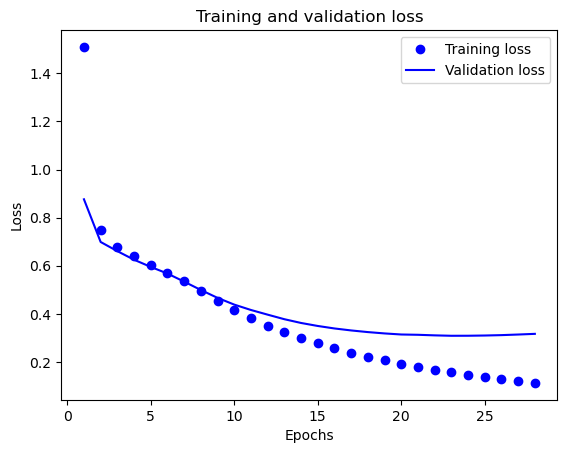

In [ ]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
from sklearn.metrics import accuracy_score
import numpy as np
pred = model.predict(x_val)
# Use 0.5 as the threshold
predict_classes = pred.flatten()>0.5
correct = accuracy_score(y_val,predict_classes)
print(f"Accuracy: {correct}")

313/313 [==============================] - 1s 3ms/step
Accuracy: 0.8744
